Ефремов Данил БЭК193

In [1]:
import sys
import math
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn
from scipy.stats import t, chi2, f, norm, poisson, binom, uniform, geom


In [2]:
np.set_printoptions(suppress = True)


In [3]:
# 1. Постройте графики гистограммы и выборочной
#    функции распредленеия для распределений:
#    1)     Хи-Квадрат с 5-ю степенями свободы
#    2)     Стьюдента с 10-ю степенями свободы
#    3)     Нормального с математическим ожиданием 10
#           и дисперсией 25


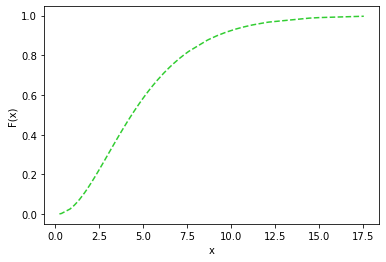

In [4]:
n = 100
df = 5
x = chi2.rvs(size = n, df = df)
x = np.sort(x)
F_x = chi2.cdf(x, df = df)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot(x, F_x, '--', markersize = 1, label = "CDF", color = "limegreen");


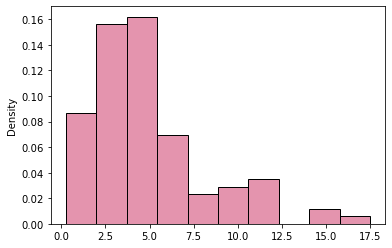

In [5]:
seaborn.histplot(x, stat = 'density', color = "palevioletred", label = "histogram", bins = 10);


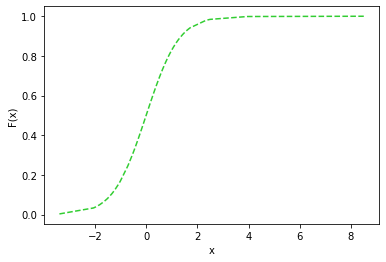

In [6]:
n = 100
df = 10
x = t.rvs(size = n, df = df) 
x = np.sort(x)
F_x = t.cdf(x, df = df)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot(x, F_x, '--', markersize = 1, label = "CDF", color = "limegreen");


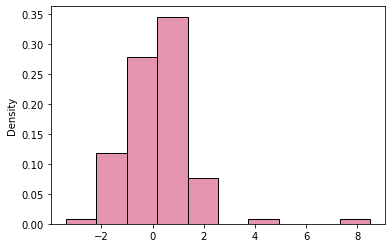

In [7]:
seaborn.histplot(x, stat = 'density', color = "palevioletred", label = "histogram", bins = 10);


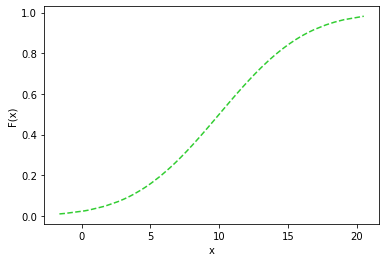

In [8]:
m = 10
var = 5
x = norm.rvs(loc=m, scale=var, size=n)
x = np.sort(x)
F_x = norm.cdf(x, loc=m, scale=var)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot(x, F_x, '--', markersize = 1, label = "CDF", color = "limegreen");


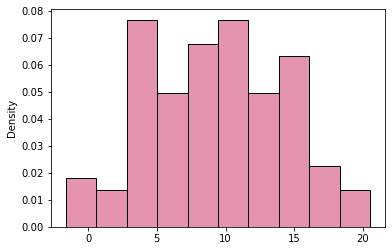

In [9]:
seaborn.histplot(x, stat = 'density', color = "palevioletred", label = "histogram", bins = 10);


In [10]:
# 2. В каждом пункте предыдущего задания проверьте,
#    как объем выборки влияет на то, насколько близки
#    окажутся выборочные и истинные характеристики
#    распределения. Сравните выборки объемом
#    в 10, 100, 1000 и 10000 наблюдений. При увеличении
#    объема выборки увеличивайте число столбиков
#    в гистограмме.


In [11]:
print('Эмпирические')
for i in (10, 100, 1000, 10000):
    x = chi2.rvs(size = i, df=5)
    print(i, ':')
    print(np.mean(x))
print('Теоретические')
print(5)
print('Эмпирические')
for i in (10, 100, 1000, 10000):
    print(i, ':')
    x = chi2.rvs(size = i, df=5)
    print(np.var(x))
print('Теоретические')
print(10)


Эмпирические
10 :
5.068651544661473
100 :
5.11550931351308
1000 :
4.872790947249894
10000 :
4.994384980114564
Теоретические
5
Эмпирические
10 :
12.93289894242098
100 :
9.2312714428243
1000 :
9.828996443438216
10000 :
10.0691553892145
Теоретические
10


Заметим, что с увеличением выборки характеристики становятся более похожими на истинное значение, аналогично можно сделать и для остальных характеристик, опредлим будет ли та же зависимость у 2 других распределений

In [12]:
print('Эмпирические')
for i in (10, 100, 1000, 10000):
    x = t.rvs(size = i, df=10)
    print(i, ':')
    print(np.mean(x))
print('Теоретические')
print(0)
print('Эмпирические')
for i in (10, 100, 1000, 10000):
    print(i, ':')
    x = t.rvs(size = i, df=10)
    print(np.var(x))
print('Теоретические')
print(10/8)


Эмпирические
10 :
-0.17666104060457566
100 :
0.32244704832438453
1000 :
0.02958524227646688
10000 :
-0.022761393838381667
Теоретические
0
Эмпирические
10 :
0.8150622221977255
100 :
1.443877441517045
1000 :
1.2653255265247463
10000 :
1.2403493854641157
Теоретические
1.25


In [13]:
print('Эмпирические')
for i in (10, 100, 1000, 10000):
    x = norm.rvs(loc=10, scale=5, size=i)
    print(i, ':')
    print(np.mean(x))
print('Теоретические')
print(10)
print('Эмпирические')
for i in (10, 100, 1000, 10000):
    print(i, ':')
    x = norm.rvs(loc=10, scale=5, size=i)
    print(np.var(x))
print('Теоретические')
print(25)


Эмпирические
10 :
11.25065781779461
100 :
9.711281561053653
1000 :
10.04117126854706
10000 :
9.970280398540615
Теоретические
10
Эмпирические
10 :
13.558540726784532
100 :
28.561174558330553
1000 :
24.946581430444407
10000 :
25.716041891829548
Теоретические
25


Для нормального распределения построим гистограммы

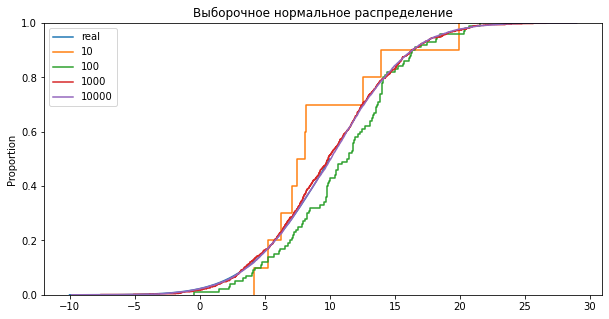

In [14]:
plt.figure(figsize=(10,5))
k2 = np.arange(-10, 10, 0.001)
m2 = norm.cdf(k2, loc = 10, scale = 5)
u1 = norm.rvs(size = 10, loc = 10, scale = 5)
u2 = norm.rvs(size = 100, loc = 10, scale = 5)
u3 = norm.rvs(size = 1000, loc = 10, scale = 5)
u4 = norm.rvs(size = 10000, loc = 10, scale = 5)
plt.plot(k2, m2, label='real')
seaborn.ecdfplot(u1, label='10')
seaborn.ecdfplot(u2, label='100')
seaborn.ecdfplot(u3, label='1000')
seaborn.ecdfplot(u4, label='10000')
plt.legend(loc='upper left')
plt.title('Выборочное нормальное распределение');


In [15]:
# 3. Самостоятельно запрограммируйте функции,
#    позволяющие рассчитывать значение выборочной
#    функции распределения для каждого:
#    1)    Наблюдения в выборке
#    2*)   Значения в произвольном векторе (то же самое)


In [16]:
def ecdf(t, x):
    return np.mean(x <= t)


In [17]:
# 4. Самостоятельно запрограммируйте функции,
#    позволяющие рассчитывать значение гистограммы
#    для каждого:
#    1)    Наблюдения в выборке
#    2*)   Значения в произвольном векторе (то же самое)


In [18]:
def znach(t, x):
    t_adj = t - min(x)
    x_adj = x - min(x)
    bin_n = 10
    bin_w = (max(x) - min(x)) / bin_n
    t_w_ratio = (t_adj) / bin_w
    bin_t = math.floor(t_w_ratio) + 1 
    return len(x[(x_adj >= ((bin_t - 1) * bin_w)) & (x_adj < (bin_t * bin_w))]) / (n * bin_w)


In [19]:
# 5. Самостоятельно запрограммируйте функции,
#    позволяющие по выборке строить график:
#    1)    Выборочной функции распределения
#    2*)   Гистограммы с произвольным
#          числом столбиков


In [20]:
def F_x(x):
    x = np.sort(x)
    n = np.linspace(min(x), max(x), 10000)
    F_x = []
    for i in n:
        F_x.append(ecdf(i, x))
    plt.xlabel('x')
    plt.ylabel('F(x)')
    return plt.plot(n, F_x, '--', markersize = 1, label = "CDF", color = "limegreen");


In [21]:
def histo(x, n):
    return seaborn.histplot(x, stat = 'density', color = "palevioletred", label = "histogram", bins = n) 


In [22]:
# 6. Используя ЗБЧ и несколько выборок из Хи-Квадрат
#    распределения приблизительно рассчитайте:
#    1**)  Математическое ожидание выборочной функции
#          распределения в точке 5
#    2**)  Дисперсию выборочной функции распределения
#          в точке 5


In [23]:
E = []
for i in range(100):
    n = 1000
    df = 5
    x = chi2.rvs(size = n, df = df)
    x = np.sort(x)
    y = abs(x - 5)
    z = np.where(y == min(y))[0][0]
    F_x = chi2.cdf(x, df = df)
    E.append(F_x[z])
np.mean(E)


0.5840402567397919

In [24]:
np.var(E)


6.124427676903289e-07

In [25]:
# 1. Визуализируйте для выборки объема 5000 из распределения
#    Стьюдента с 10-ю степенями свободы, при помощи Гистограммы,
#    распределение:
#    1)     Второго начального выборочного момента
#    2)     Выборочной дисперсии
#    3)     Выборочной медианы
#    4)     Третьей порядковой статистики, то есть
#           третьего элемента вариационного ряда
#    5)     Выборочной квантили уровня 0.8
#    6)     Выборочной функции распределения в точке 5


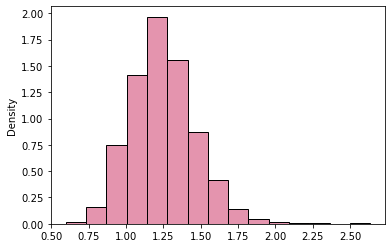

In [26]:
m = 5000
n = 100
df = 10
x_mean = np.empty(m) 
x_var = np.empty(m)
x_median = np.empty(m)
x_three = np.empty(m)
x_q = np.empty(m)
x_F = np.empty(m)
for i in range(0, m):
    x = t.rvs(size = n, df = df)
    x_mean[i] = np.mean(x ** 2)
    x_var[i] = np.var(x)
    x_median[i] = np.median(x)
    x_three[i] = x[2]
    x_q[i] = np.quantile(x, 0.8) 
    x_F[i] = ecdf(5, x)
x_mean = np.sort(x_mean) 
x_var = np.sort(x_var)
x_median = np.sort(x_median)
x_three = np.sort(x_three)
x_q = np.sort(x_q)
x_F = np.sort(x_F)
seaborn.histplot(x_mean, stat = 'density', color = "palevioletred", label = "histogram", bins = 15);


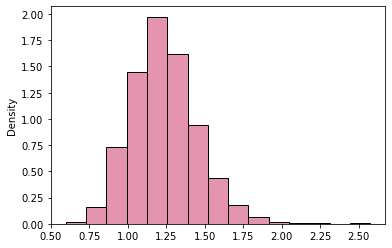

In [27]:
seaborn.histplot(x_var, stat = 'density', color = "palevioletred", label = "histogram", bins = 15);


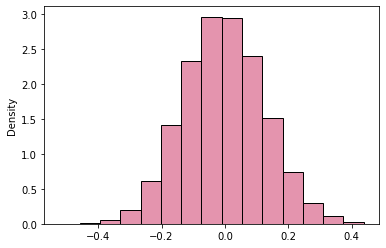

In [28]:
seaborn.histplot(x_median, stat = 'density', color = "palevioletred", label = "histogram", bins = 15);


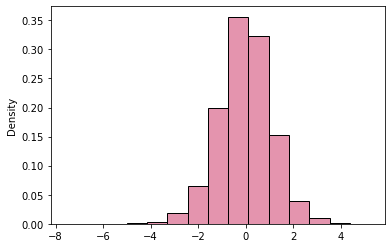

In [29]:
seaborn.histplot(x_three, stat = 'density', color = "palevioletred", label = "histogram", bins = 15);


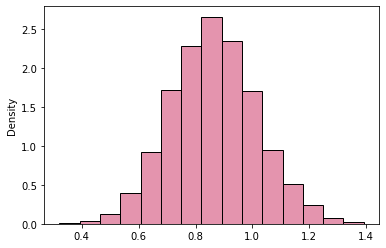

In [30]:
seaborn.histplot(x_q, stat = 'density', color = "palevioletred", label = "histogram", bins = 15);


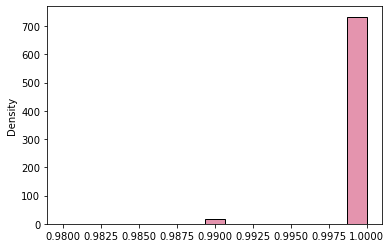

In [31]:
seaborn.histplot(x_F, stat = 'density', color = "palevioletred", label = "histogram", bins = 15);


In [32]:
# 3. Симулируйте три независимых выборки объемом в 5000 наблюдений
#    из стандартного равномерного распределения. Получите из этих
#    двух выборок две сложив первую со второй, а вторую - с третьей.
#    Для получившихся выборок:
#    1)     Посчитайте выборочную ковариационную матрицу
#    2)     Рассчитайте выборочную корреляционную матрицу
#    3*)    При помощи гистограммы визуализируйте распределение
#           выборочной корреляции


In [33]:
x1 = norm.rvs(loc=0, scale=1, size=5000)
x2 = norm.rvs(loc=0, scale=1, size=5000)
x3 = norm.rvs(loc=0, scale=1, size=5000)
x4 = x1 + x2
x5 = x2 + x3
print(np.cov(x4, x5))
print(np.corrcoef(x4, x5))


[[2.01616147 1.02251723]
 [1.02251723 2.02218847]]
[[1.         0.50640405]
 [0.50640405 1.        ]]


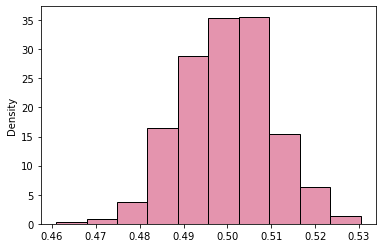

In [34]:
m = 1000
x = np.empty(m)
for i in range(0, m):
    x1 = norm.rvs(loc=0, scale=1, size=5000) 
    x2 = norm.rvs(loc=0, scale=1, size=5000)
    x3 = norm.rvs(loc=0, scale=1, size=5000)
    x4 = x1 + x2
    x5 = x2 + x3
    x[i] = np.corrcoef(x4, x5)[1][0]
x = np.sort(x)
seaborn.histplot(x, stat = 'density', color = "palevioletred", label = "histogram", bins = 10);


In [35]:
# 4. Самостоятельно запрограммируйте функции, позволяющие рассчитывать
#    1)     Выборочное среднее
#    2)     Выборочную дисперсию
#    3*)    Выборочную медиану
#    4)     Порядковые статистики
#    5*)    Выборочную ковариационную матрицу


In [36]:
def mean(x):
    return sum(x) / len(x)


In [37]:
def var(x):
    x = (x - mean(x)) ** 2
    return mean(x)


In [38]:
def median(x):
    return np.quantile(x, 0.5)


In [39]:
def stat(x, t):
    return x[t - 1]


In [40]:
def cov(x, y):
    var1 = var(x)
    var2 = var(y)
    cov = mean(x * y) - mean(x) * mean(y)
    return [[var1, cov], [cov, var2]]


In [41]:
# 5. Симулируйте три независимые выборки: две из стандартного нормального
#    распределения и одну из Хи-Квадрат распределения с двумя степенями
#    свободы. Сформируйте еще одну выборку сложив квадраты выборок из
#    стандартных нормальных распределений. Сравните выборочные характеристики
#    получившейся выборки с выборочными характеристиками выборки из Хи-Квадрат
#    распределения с двумя степенями свободы. Сделайте выводы о причинах
#    налблюдаемого сходства в выборочных характеристиках.


In [42]:
n = 100
m = 0
var = 1
df = 2
n1 = norm.rvs(loc=m, scale=var, size=n)
n2 = norm.rvs(loc=m, scale=var, size=n)
x = chi2.rvs(size = n, df = df)
normal = n1 ** 2 + n2 ** 2
print('нормальное')
for i in [normal, x]:
    print(np.mean(i))
    print(np.var(i))
    print(np.median(i))
    print(np.mean(i ** 3))
    print(np.quantile(i, 0.4))
    print('--------------')
print('хи-квадрат')


нормальное
1.885029081550306
3.770294232787039
1.3482972103085238
44.14753216912738
1.039497314933091
--------------
1.7597251029924694
2.1879090851840797
1.2817704315067475
20.350684431091643
1.073437811027671
--------------
хи-квадрат


Распределение хи-квадрат является распределением получившейся выборки

In [43]:
# 1. Симулируйте выборку объемом в 10000
#    наблюдений из распределения:
#    1)     Хи-Квадрат с 5-ю степенями свободы
#    2)     Стьюдента с 10-ю степенями свободы
#    3)     Нормального с математическим ожиданием 10
#           и дисперсией 25


In [44]:
n = 10000
df = 5
x1 = chi2.rvs(size = n, df = df)
dff = 10
x2 = t.rvs(size = n, df = df) 
m = 10
var = 5
x3 = norm.rvs(loc=m, scale=var, size=n)


In [45]:
# 2. Симулируйте выборку из Хи-Квадрат распределения
#    с 10-ю степенями свободы. При помощи ЗБЧ найдите
#    аппроксимации:
#    1)    E(X)
#    2)    E(X ^ 3)
#    2)    Var(X)
#    3*)   Median(X)
#    4)    P(X <= 1.7)
#    5*)   квантиль X уровня 0.3
#    6)    Var(sin(X))


In [46]:
n = 10000
df = 10
x = chi2.rvs(size = n, df = df)
print(np.mean(x))
print(np.mean(x**3))
print(np.var(x))
print(np.median(x))
print(ecdf(1.7, x))
print(np.quantile(x, 0.3))
print(np.var(np.sin(x)))


10.038389352409105
1705.9747730745214
20.30438585593713
9.392282745856258
0.0026
7.303560939739891
0.49940871699971423


In [47]:
# 3. Пусть X и Y независимые случайные величины, причем
#    X~U(1,5) и Y~chi2(5). При помощи ЗБЧ аппроксимируйте:
#    1)    E(X + Y)
#    2)    P(X - Y <= 2)
#    3)    Var(X / Y)


In [48]:
n = 10000
df = 5
x = chi2.rvs(size = n, df = df)
l = 1
h = 5
y = uniform.rvs(size = n, loc = l, scale = h - 1)
print(np.mean(x + y))
print(ecdf(2, x - y))
print(np.var(x / y))


7.944701210268153
0.5784
2.832058671047579


In [49]:
# 4. В предыдущих задачах постройте графики, демонстрирующие,
#    что вероятность отклонения аппроксимаций от истинных
#    значений снижается по мере увеличения объема выборки.
#    В качестве метрики используйте:
#    1*)   Абсолютное отклонение
#    2*)   Квадрат абсолютного отклонения


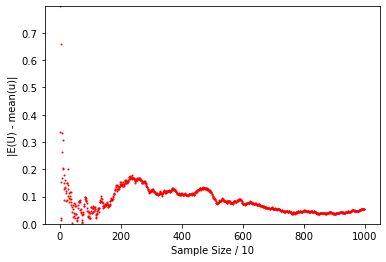

In [50]:
step = 10
m = int(len(y + x) / step)
u_mean = np.zeros(m)
summ = x + y


for i in range(0, m):
    u_mean[i] = np.mean(summ[0:((i + 1) * step - 1)])
dev = abs(u_mean - 8)


plt.xlabel('Sample Size / ' + str(step))
plt.ylabel('|E(U) - mean(u)|')
plt.ylim(ymin = 0, ymax = max(dev))
plt.plot(dev, 'ro', markersize = 1)


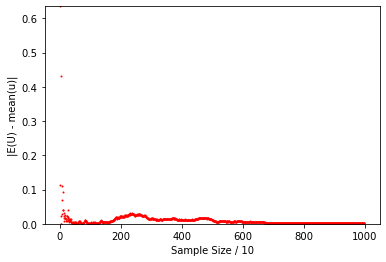

In [51]:
step = 10
m = int(len(y + x) / step)
u_mean = np.zeros(m)
summ = x + y
u_mean = np.zeros(m)


for i in range(0, m):
    u_mean[i] = np.mean(summ[0:((i + 1) * step - 1)])
dev = (u_mean - 8)**2


plt.xlabel('Sample Size / ' + str(step))
plt.ylabel('|E(U) - mean(u)|')
plt.ylim(ymin = 0, ymax = max(dev))
plt.plot(dev, 'ro', markersize = 1)


In [52]:
# 5. Не используя встроенные функции симулируйте выборку из:
#    1)    Распределения Бернулли с параметром p = 0.3
#    2)    Биномиального распределения с
#          параметрами n = 5, p = 0.3 (используйте встроенную квантильную функцию)
#    3)    Экспоненциального распределения с параметром lambda = 5
#    4)    Нормального распределения с
#          параметрами mu = 5, sigma = 25 (используйте встроенную квантильную функцию)
#    5*)   Геометрического распределения с
#          вероятностью успеха 0.3
#    6**)  Распределения Пуассона с математическим
#          ожидаем 5
#    7**)  Суммы распределений из предыдущих двух пунктов,
#          предполагая независимость.


In [53]:
n = 1000
A = np.array([])
for i in range(n):
    A = np.append(A, np.array([random.choices([0, 1], weights=[7, 3])[0]]))
seaborn.distplot(A, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})  


NameError: name 'random' is not defined

In [ ]:
q = 1000
n = 5
p = 0.3
A = np.array([])
for i in range(q):
    B = [np.random.random() for i in range(n)]
    A = np.append(A, np.array(len([i for i in B if i>=p])))
seaborn.distplot(A, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


In [ ]:
n = 1000
A = np.array([])
for i in range(n):
    A = np.append(A, np.array(random.expovariate(5)))
seaborn.distplot(A, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


In [ ]:
n = 1000
A = np.array([])
for i in range(n):
    A = np.append(A, np.array(np.random.normal(5, 5)))
seaborn.distplot(A, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


In [ ]:
n = 1000
p = 0.3
A = np.array([])
for i in range(n):
    A = np.append(A, np.array((1 - p)**(np.random.random() - 1)*p))
seaborn.distplot(A, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


In [ ]:
n = 1000
A = np.array([])
for i in range(n):
    A = np.append(A, np.array(np.random.poisson(5)))
seaborn.distplot(A, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


In [ ]:
n = 1000
p = 0.3
A = np.array([])
for i in range(n):
    A = np.append(A, np.array(np.random.poisson(5) + np.array((1 - p)**(np.random.random() - 1)*p)))
seaborn.distplot(A, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
